In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 5432
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.han_vgg import *
from utils.train import *
from typing import *
from collections import Counter

from utils.load_yelp import *
from utils.dataset import *
from utils.train import *

In [2]:
config = default_config
config

{'task': 'CLS',
 'embedding_dim': 200,
 'embedding': None,
 'freeze_embedding': False,
 'word_hidden_size': 50,
 'word_layers': 1,
 'uniform_bound': 0.1,
 'sentence_hidden_size': 50,
 'sentence_layers': 1,
 'use_imgs': True,
 'img_input_size': 4096,
 'img_output_size': 100,
 'img_num': 3,
 'dropout': 0.5,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
train_set, valid_set, test_set= load_glove_vgg_data(config)

In [4]:
batch_size = 128
workers = 6
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)

In [5]:
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 9119105, 'Trainable': 9119105}, CrossEntropyLoss())

In [ ]:
# viz = get_Visdom()

# lr = 1e-3
# epoches = 20
# optimizer = get_regal_optimizer(model, optim.AdamW, lr)
# k_batch_train_visdom(model, optimizer, loss, valid_loader, viz, 20, 10)

In [ ]:
# k_batch_train_visdom(model, optimizer, loss, valid_loader, viz, 20, 10)

In [6]:
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

((0.19322799097065463, 0.14126633493160912),
 Counter({4: 1686, 0: 1962, 2: 766, 3: 16}))

In [7]:
viz = get_Visdom()
_interval = 5
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []


Setting up a new session...


In [8]:
%%time
lr = 1e-3
epoches = 20
optimizer = get_regal_optimizer(model, optim.AdamW, lr)
res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer,
                         _interval=_interval)


No 1 epoch: train_loss:1.5207844941298907 train_acc:0.3651290732120186 valid_loss:1.0388951304534757 valid_acc:0.5729119638826186



No 2 epoch: train_loss:1.2030189056997829 train_acc:0.43887713358724784 valid_loss:0.9555320759928253 valid_acc:0.6117381489841986



No 3 epoch: train_loss:1.150185267500488 train_acc:0.46167301452955284 valid_loss:0.9474212425287906 valid_acc:0.5988713318284424



No 4 epoch: train_loss:1.0834595243287433 train_acc:0.4932994780646071 valid_loss:0.9152493430583256 valid_acc:0.608803611738149



No 5 epoch: train_loss:1.0220416504096743 train_acc:0.5233178163351672 valid_loss:0.93057581159385 valid_acc:0.5923250564334086



No 6 epoch: train_loss:0.9538425065243862 train_acc:0.5479475243334744 valid_loss:0.9545713109571832 valid_acc:0.5871331828442438



No 7 epoch: train_loss:0.894127605546259 train_acc:0.5757934828607703 valid_loss:1.0302618813299433 valid_acc:0.582844243792325
CPU times: user 12min 43s, sys: 1min 6s, total: 13min 50s
Wall time: 13min 51s


In [9]:
res

{'max_acc': 0.6117381489841986,
 'max_acc_epoch': 2,
 'max_train_acc': 0.43887713358724784,
 'max_acc_train_loss': 1.2030189056997829,
 'max_acc_valid_loss': 0.9555320759928253,
 'last_acc': 0.582844243792325,
 'last_train_acc': 0.5757934828607703,
 'last_epoch': 7,
 'last_train_loss': 0.894127605546259,
 'last_valid_loss': 1.0302618813299433}

In [10]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.5981941309255079, 0.5914548176997841), 0.9578593667958175)

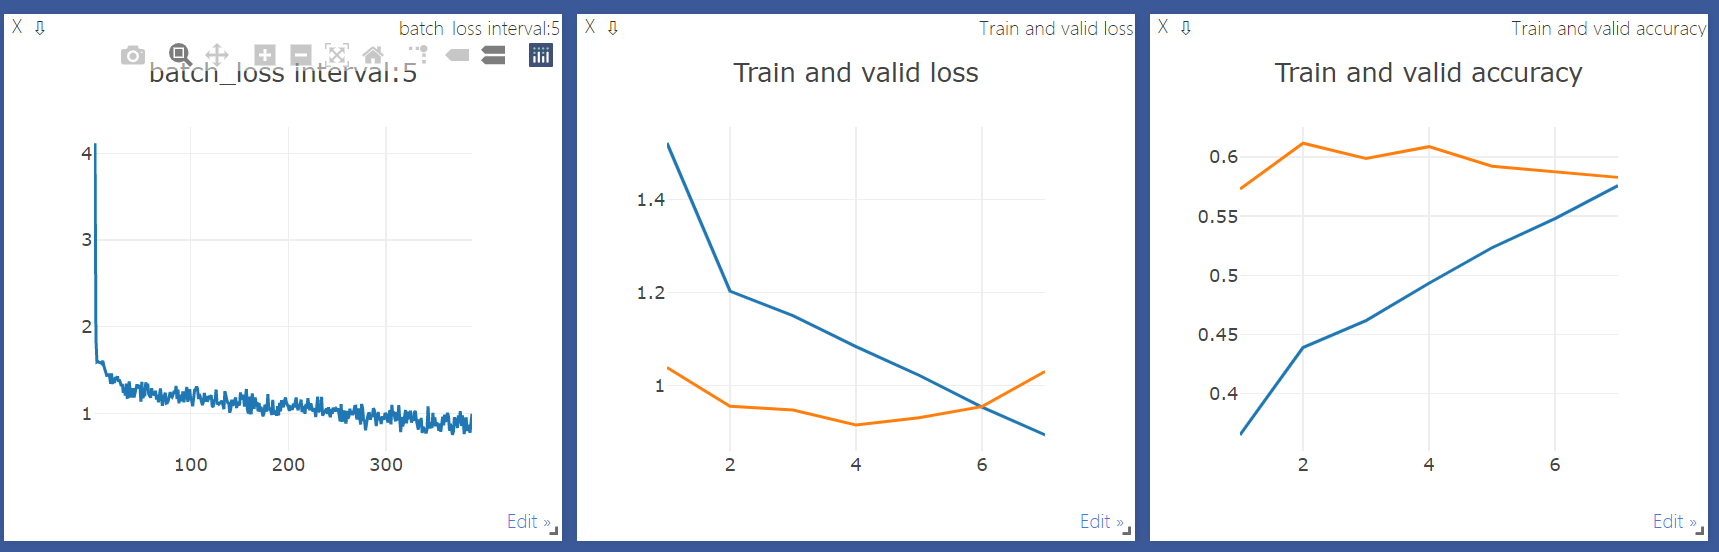

In [ ]:
# 删除图片信息

In [11]:
config["use_imgs"] = False
config

{'task': 'CLS',
 'embedding_dim': 200,
 'embedding': Embedding(42834, 200),
 'freeze_embedding': False,
 'word_hidden_size': 50,
 'word_layers': 1,
 'uniform_bound': 0.1,
 'sentence_hidden_size': 50,
 'sentence_layers': 1,
 'use_imgs': False,
 'img_input_size': 4096,
 'img_output_size': 100,
 'img_num': 3,
 'dropout': 0.5,
 'output_size': 5,
 'bias_init': 1.0,
 'vocab_size': 42822}

In [12]:
batch_size = 128
workers = 6
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)

In [13]:
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

({'Total': 8708905, 'Trainable': 8708905}, CrossEntropyLoss())

In [14]:
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

((0.20406320541760722, 0.09765245197241668),
 Counter({1: 3961, 3: 265, 4: 199, 0: 5}))

In [17]:
viz = get_Visdom()
_interval = 5
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []


Setting up a new session...


In [18]:
%%time
lr = 1e-3
epoches = 20
optimizer = get_regal_optimizer(model, optim.AdamW, lr)
res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer,
                         _interval=_interval)


No 1 epoch: train_loss:1.2247720027814077 train_acc:0.4287769784172662 valid_loss:1.005501662850649 valid_acc:0.5733634311512416



No 2 epoch: train_loss:0.9906611288278256 train_acc:0.5279447030610805 valid_loss:1.038086357961659 valid_acc:0.5602708803611738



No 3 epoch: train_loss:0.899648576560352 train_acc:0.5671039638877133 valid_loss:1.0718940102219852 valid_acc:0.5546275395033861



No 4 epoch: train_loss:0.8317696846310049 train_acc:0.5971505148822118 valid_loss:1.1557833931246946 valid_acc:0.5469525959367946



No 5 epoch: train_loss:0.7794063407235664 train_acc:0.6199181831005783 valid_loss:1.1967983632270693 valid_acc:0.5530474040632054



No 6 epoch: train_loss:0.7401470158193962 train_acc:0.633544928762872 valid_loss:1.3437942307366744 valid_acc:0.5419864559819413
CPU times: user 10min 44s, sys: 56.8 s, total: 11min 41s
Wall time: 11min 43s


In [19]:
res

{'max_acc': 0.5733634311512416,
 'max_acc_epoch': 1,
 'max_train_acc': 0.4287769784172662,
 'max_acc_train_loss': 1.2247720027814077,
 'max_acc_valid_loss': 1.005501662850649,
 'last_acc': 0.5419864559819413,
 'last_train_acc': 0.633544928762872,
 'last_epoch': 6,
 'last_train_loss': 0.7401470158193962,
 'last_valid_loss': 1.3437942307366744}

In [20]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.5654627539503386, 0.5694702355610965), 1.006021492583488)